<a href="https://colab.research.google.com/github/yogaliu-ds/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Competition


# 1. Getting to know featrues

  Do they matter?

1-1 (NaN) Cabin

In [ ]:
with_cabin = train[train['Cabin'].isna()==False]
without_cabin = train[train['Cabin'].isna()==True]

print(with_cabin)
print(without_cabin)

#find mean of each group
with_cabin_mean = with_cabin['Survived'].mean()
without_cabin_mean = without_cabin['Survived'].mean()

print(with_cabin_mean)
print(without_cabin_mean)

# So Cabin does matter, But how much?

     PassengerId  Survived  Pclass  ...     Fare        Cabin  Embarked
1              2         1       1  ...  71.2833          C85         C
3              4         1       1  ...  53.1000         C123         S
6              7         0       1  ...  51.8625          E46         S
10            11         1       3  ...  16.7000           G6         S
11            12         1       1  ...  26.5500         C103         S
..           ...       ...     ...  ...      ...          ...       ...
871          872         1       1  ...  52.5542          D35         S
872          873         0       1  ...   5.0000  B51 B53 B55         S
879          880         1       1  ...  83.1583          C50         C
887          888         1       1  ...  30.0000          B42         S
889          890         1       1  ...  30.0000         C148         C

[204 rows x 12 columns]
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.25

1-2 (NaN) Age

In [ ]:
with_age = train[train['Age'].isna()==False]
without_age = train[train['Age'].isna()==True]

with_age_mean = with_age['Survived'].mean()
without_age_mean = train['Survived'].mean()

print(with_age_mean)
print(without_age_mean)

# People with age does have higher survival rate, but the differnece is too little.
# The difference is only 0.022.
# It's too minor, so I'm not gonna take into consideration.

0.4061624649859944
0.3838383838383838


1-3 Name

In [ ]:
# I don't know if Name matters or not
# Because I don't know how to analyze it.
# I do think about maybe the last name indicate the rich family or powerful family.
# Or some kind of celebrity.

# I will try finding a way to analyze it.

1-4 Passenger ID

In [ ]:
# I don't think it matters. Just lke Name.

1-5 pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


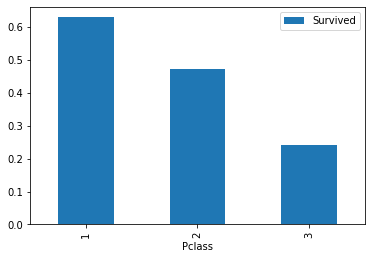

In [ ]:
print(train['Pclass'])

pclass = train.groupby('Pclass', as_index=False)['Survived'].mean()
print(pclass)

pclass.plot(x='Pclass', y='Survived' ,kind='bar')
plt.show()

# So pclass really matters

1-6 Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
      Sex  Survived
0  female  0.742038
1    male  0.188908


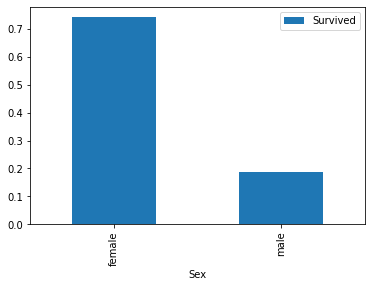

In [ ]:
print(train['Sex'])

sex = train.groupby('Sex', as_index=False)['Survived'].mean()
print(sex)

sex.plot(x='Sex', y='Survived', kind='bar')

# Female is easier to survive, but we haven't consider 'collinearity' yet.

1-7 SibSp

466
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


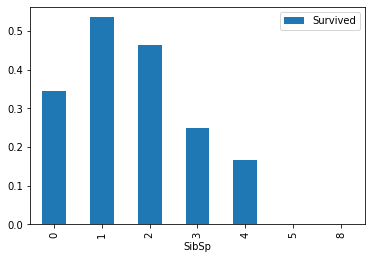

In [ ]:
print(train['SibSp'].sum())

sibsp = train.groupby('SibSp', as_index=False)['Survived'].mean()
print(sibsp)
sibsp.plot(x='SibSp', y='Survived', kind='bar')
plt.show()

# This insteresting because I couldn't find a reason for it.
# Looks like people with 1 or 2 siblings are most likely to survive. 

1-8 Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64
   Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1


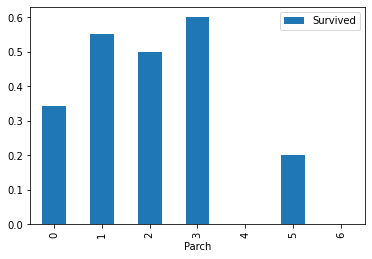

In [ ]:
print(train['Parch'])

parch_count = train.groupby('Parch', as_index=False)['Parch'].count()
print(parch_count)

parch = train.groupby('Parch', as_index=False)['Survived'].mean()
parch.plot(x='Parch', y='Survived', kind='bar')
plt.show()

# It seens like doesn't matter, you should be careful of the numbers.
# It's wrong that 5 parch give them more survive rate, because the sample is too small.

In [ ]:
# See if Cabin Number matters
# train_cabin = train.groupby('Cabin')['Survived'].mean()
# print(train_cabin)

# 2. Import module and data

In [54]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns 


train = pd.read_csv('/content/drive/MyDrive/Kaggle/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/Titanic/test.csv')
gender_sub = pd.read_csv('/content/drive/MyDrive/Kaggle/Titanic/gender_submission.csv')


# 3. Data Preprocessing

In [55]:
# (Age) transform to numeric
# pd.to_numeric(train.Age)

# (Embarked) Drop rows with NaN
train.dropna(subset=['Embarked'], inplace=True)

# (Age) fill in sample mean
train.Age.fillna(29.7, inplace=True)

# (Cabin) change into boolean
train.Cabin = train.Cabin.isna()
train.Cabin = train.Cabin.replace({True:1, False:0})


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    int64  
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB
None


# 4. Logistic Regression

In [60]:
# Change the order of columns
train_temp = train.reindex(columns = ['Survived', 'Name', 'PassengerId', 'Ticket', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked'])
train_temp = train.drop(columns=['Name', 'PassengerId', 'Ticket'], axis=1)

# Get dummies
train_temp = pd.get_dummies(train_temp)

# Scaling
scaler = StandardScaler()
scaler.fit_transform(train_temp)


X = train_temp.iloc[:, 1:]
y = train_temp.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)
logreg = LogisticRegression()
cross_score = cross_val_score(logreg, X_train, y_train, cv=5)
logreg.fit(X_train, y_train)
print(cross_score.mean())

y_pred = logreg.predict(X_test)

score = accuracy_score(y_test, y_pred)



0.788998325618044


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
